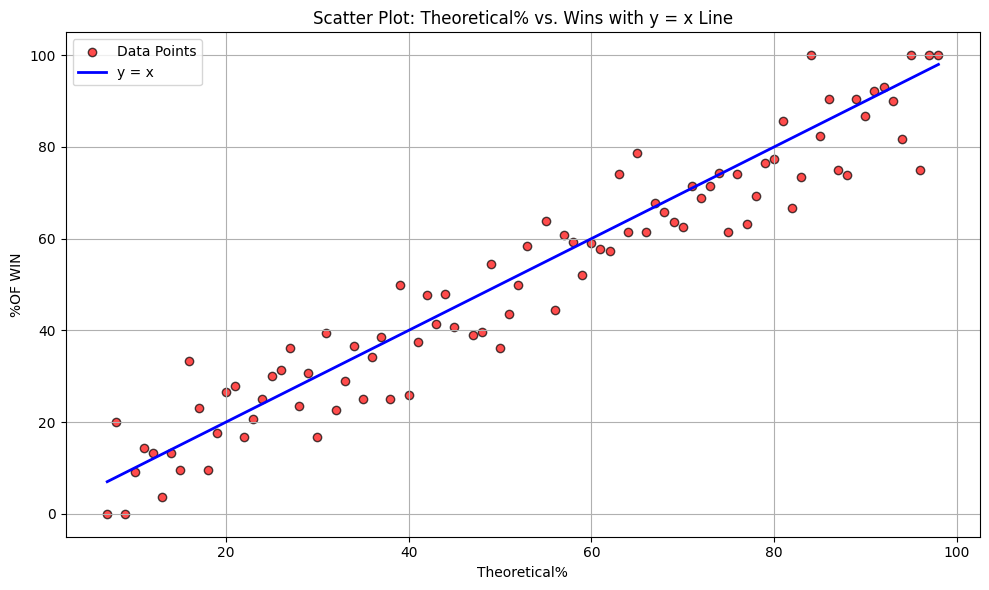

In [5]:
import pandas as pd


df = pd.read_csv('result_NN.csv')  # If data is in a CSV file

import matplotlib.pyplot as plt

# Extract data for scatter plot
x = df['Theoretical%']
y = df['%OF WIN']  # Assuming 'Won' represents the number of wins

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Scatter plot
plt.scatter(x, y, color='red', alpha=0.7, edgecolors='k', label='Data Points')

# Line y = x
plt.plot(x, x, color='blue', linestyle='-', linewidth=2, label='y = x')

plt.title('Scatter Plot: Theoretical% vs. Wins with y = x Line')
plt.xlabel('Theoretical%')
plt.ylabel('%OF WIN')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


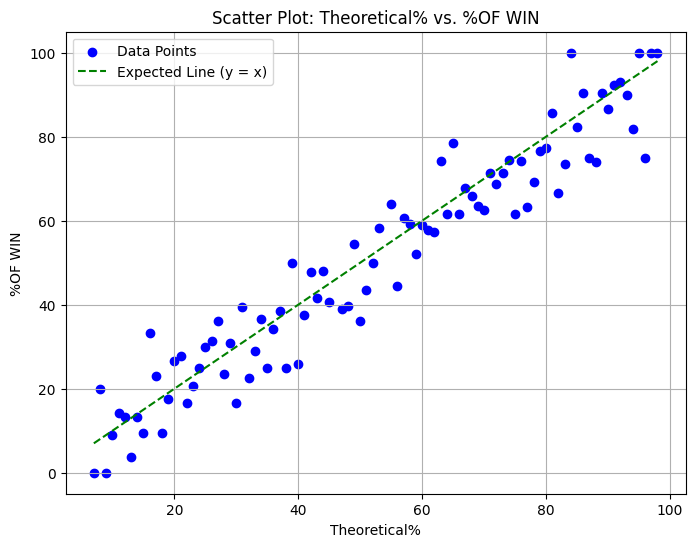

Pearson correlation coefficient: 0.9600719087516375
P-value: 1.8280025115825187e-50


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

df = pd.read_csv('result_NN.csv')  # If data is in a CSV file

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df["Theoretical%"], df["%OF WIN"])

# Perform linear regression
model = LinearRegression()
X = df[["Theoretical%"]]
y = df["%OF WIN"]
model.fit(X, y)

# Predicted values from the model
y_pred = model.predict(X)

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(df["Theoretical%"], df["%OF WIN"], color='blue', label='Data Points')
plt.plot(X, X, color='green', linestyle='--', label='Expected Line (y = x)')
plt.xlabel('Theoretical%')
plt.ylabel('%OF WIN')
plt.title('Scatter Plot: Theoretical% vs. %OF WIN')
plt.legend()
plt.grid(True)
plt.show()

# Print correlation coefficient and p-value
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")


R-squared: 0.9217380699740125


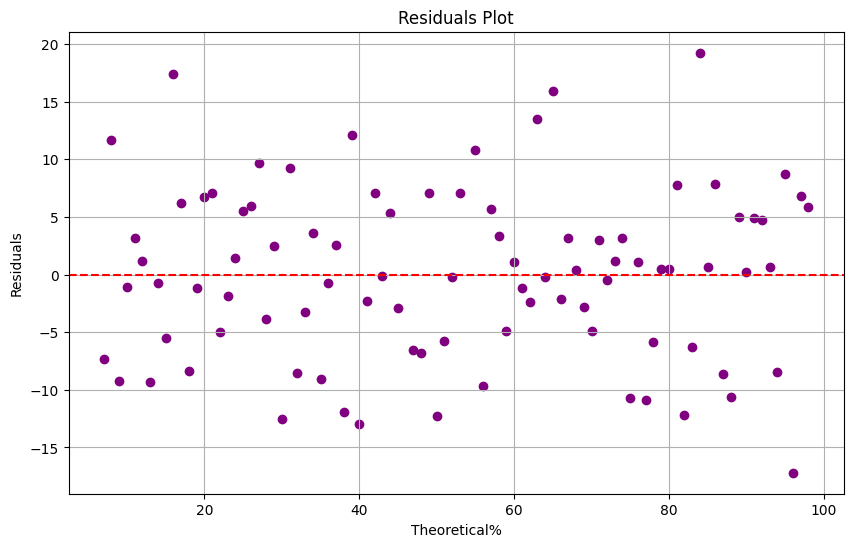

Intercept: 0.6676997107330607
Coefficient: 0.9533841492672357


In [7]:
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Theoretical%')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


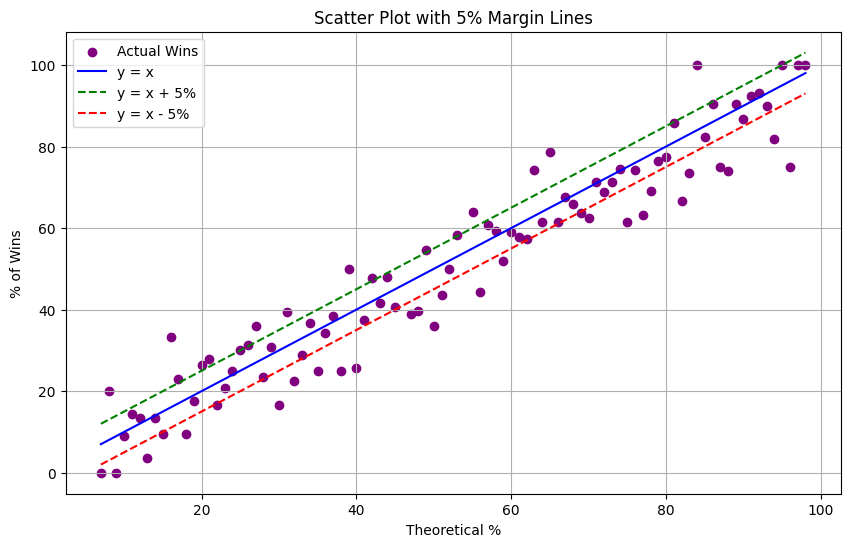

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = np.genfromtxt('result_NN.csv', delimiter=',', skip_header=1, dtype=float)

# Extract columns
theoretical_percent = data[:, 0]  # Assuming Theoretical% is the first column
loose = data[:, 1]                # Assuming Loose is the second column
won = data[:, 2]                  # Assuming Won is the third column
actual_wins = data[:, 3]          # Assuming %OF WIN is the fourth column

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(theoretical_percent, actual_wins, color='purple', label='Actual Wins')

# Perfect prediction line
x = np.linspace(min(theoretical_percent), max(theoretical_percent), 100)
plt.plot(x, x, color='blue', linestyle='-', label='y = x')

# 5% above and below lines
plt.plot(x, x + 5, color='green', linestyle='--', label='y = x + 5%')
plt.plot(x, x - 5, color='red', linestyle='--', label='y = x - 5%')

# Plot labels and legend
plt.xlabel('Theoretical %')
plt.ylabel('% of Wins')
plt.title('Scatter Plot with 5% Margin Lines')
plt.legend()
plt.grid(True)
plt.show()

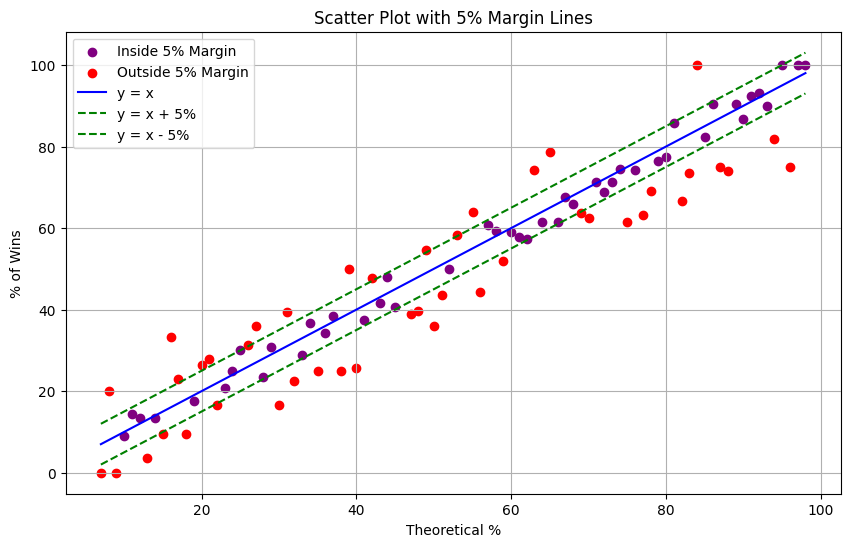

Number of points inside the 5% margin: 46
Number of points outside the 5% margin: 44


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = np.genfromtxt('result_NN.csv', delimiter=',', skip_header=1, dtype=float)

# Extract columns
theoretical_percent = data[:, 0]  # Assuming Theoretical% is the first column
actual_wins = data[:, 3]          # Assuming %OF WIN is the fourth column

# Scatter plot
plt.figure(figsize=(10, 6))

# Determine points inside and outside the 5% margin
inside_margin = (actual_wins >= theoretical_percent - 5) & (actual_wins <= theoretical_percent + 5)
outside_margin = ~inside_margin

# Plot points
plt.scatter(theoretical_percent[inside_margin], actual_wins[inside_margin], color='purple', label='Inside 5% Margin')
plt.scatter(theoretical_percent[outside_margin], actual_wins[outside_margin], color='red', label='Outside 5% Margin')

# Perfect prediction line
x = np.linspace(min(theoretical_percent), max(theoretical_percent), 100)
plt.plot(x, x, color='blue', linestyle='-', label='y = x')

# 5% above and below lines
plt.plot(x, x + 5, color='green', linestyle='--', label='y = x + 5%')
plt.plot(x, x - 5, color='green', linestyle='--', label='y = x - 5%')

# Plot labels and legend
plt.xlabel('Theoretical %')
plt.ylabel('% of Wins')
plt.title('Scatter Plot with 5% Margin Lines')
plt.legend()
plt.grid(True)
plt.show()
#I need to look at the 
# Print the number of points inside and outside the margin
num_inside = np.sum(inside_margin)
num_outside = np.sum(outside_margin)
print(f'Number of points inside the 5% margin: {num_inside}')
print(f'Number of points outside the 5% margin: {num_outside}')


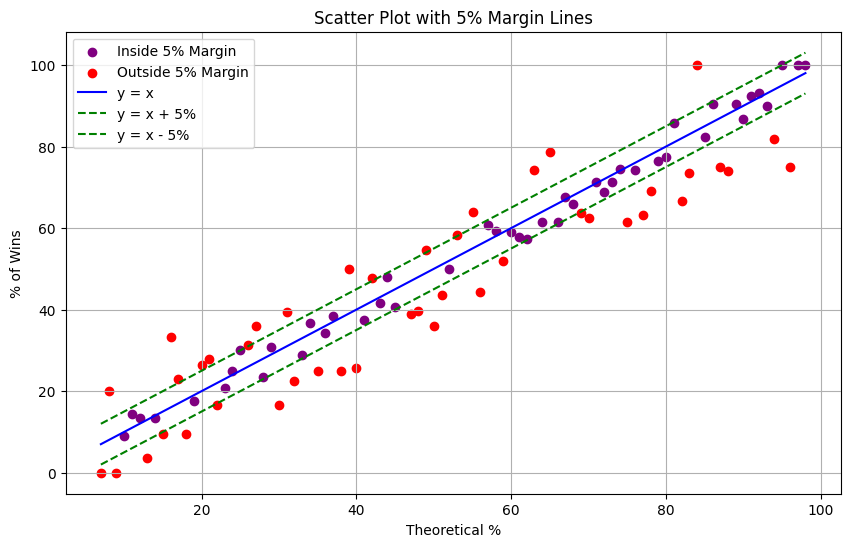

Number of points inside the 5% margin: 46
Number of points outside the 5% margin: 44
Number of points above the y = x line: 37
Number of points below the y = x line: 53


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = np.genfromtxt('result_NN.csv', delimiter=',', skip_header=1, dtype=float)

# Extract columns
theoretical_percent = data[:, 0]  # Assuming Theoretical% is the first column
actual_wins = data[:, 3]          # Assuming %OF WIN is the fourth column

# Scatter plot
plt.figure(figsize=(10, 6))

# Determine points inside and outside the 5% margin
inside_margin = (actual_wins >= theoretical_percent - 5) & (actual_wins <= theoretical_percent + 5)
outside_margin = ~inside_margin

# Determine points above and below the y = x line
above_line = actual_wins > theoretical_percent
below_line = actual_wins < theoretical_percent

# Plot points
plt.scatter(theoretical_percent[inside_margin], actual_wins[inside_margin], color='purple', label='Inside 5% Margin')
plt.scatter(theoretical_percent[outside_margin], actual_wins[outside_margin], color='red', label='Outside 5% Margin')

# Perfect prediction line
x = np.linspace(min(theoretical_percent), max(theoretical_percent), 100)
plt.plot(x, x, color='blue', linestyle='-', label='y = x')

# 5% above and below lines
plt.plot(x, x + 5, color='green', linestyle='--', label='y = x + 5%')
plt.plot(x, x - 5, color='green', linestyle='--', label='y = x - 5%')

# Plot labels and legend
plt.xlabel('Theoretical %')
plt.ylabel('% of Wins')
plt.title('Scatter Plot with 5% Margin Lines')
plt.legend()
plt.grid(True)
plt.show()
#classification aggregate ther datat
# Print the number of points inside and outside the margin
num_inside = np.sum(inside_margin)
num_outside = np.sum(outside_margin)
print(f'Number of points inside the 5% margin: {num_inside}')
print(f'Number of points outside the 5% margin: {num_outside}')

# Print the number of points above and below the y = x line
num_above_line = np.sum(above_line)
num_below_line = np.sum(below_line)
print(f'Number of points above the y = x line: {num_above_line}')
print(f'Number of points below the y = x line: {num_below_line}')


In [6]:
import pandas as pd
from scipy import stats

df = pd.read_csv('result2.csv')

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(df['Theoretical%'], df['%OF WIN'])

# Print the results
print("Paired T-statistic:", t_stat)
print("Paired P-value:", p_value)

Paired T-statistic: 2.2237879701746004
Paired P-value: 0.028693814693276108


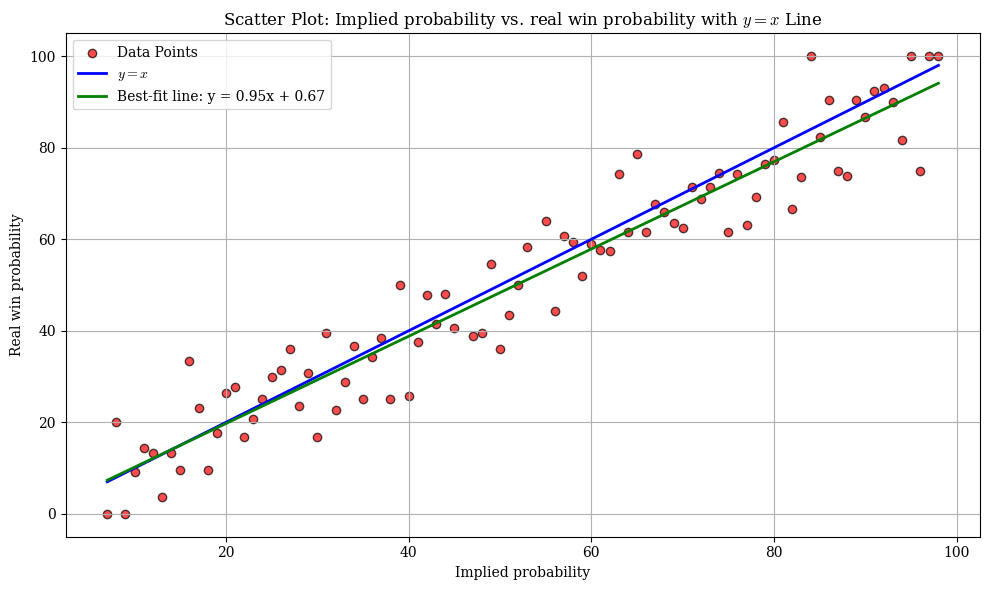

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load data from CSV file
df = pd.read_csv('result_NN.csv')

# Use built-in math rendering
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'

# Extract data for scatter plot
x = df['Theoretical%']
y = df['%OF WIN']  # Assuming '%OF WIN' is the correct column name

# Calculate the best-fit line (linear regression)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Scatter plot
plt.scatter(x, y, color='red', alpha=0.7, edgecolors='k', label='Data Points')

# Line y = x
plt.plot(x, x, color='blue', linestyle='-', linewidth=2, label=r'$y = x$')

# Best-fit line
plt.plot(x, line, color='green', linestyle='-', linewidth=2, label=f'Best-fit line: y = {slope:.2f}x + {intercept:.2f}')

plt.title(r'Scatter Plot: Implied probability vs. real win probability with $y = x$ Line')
plt.xlabel(r'Implied probability')
plt.ylabel(r'Real win probability')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()